This is the basic template to run bluesky with jupyter notebook. 

In [2]:
# load bluesky engine and best effort callback
from bluesky.run_engine import RunEngine
RE= RunEngine()
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

#Load bluesky plans and stubs plan

In [3]:
import bluesky.plans as bp
import bluesky.plan_stubs as bps

Load all the devices in p99 dodal.

In [4]:
from dodal.beamlines.p99 import *

To connect selected device do the following.

In [5]:
sample_stage = angle_stage(connect_immediately = True)

To use the device without bluesky, you can simply await the async

In [6]:
await sample_stage.read()

{'angle_stage-roll': {'value': 0.0,
  'timestamp': 1741605594.582357,
  'alarm_severity': 0},
 'angle_stage-theta': {'value': 0.0,
  'timestamp': 1741605594.582356,
  'alarm_severity': 0},
 'angle_stage-pitch': {'value': 0.0,
  'timestamp': 1741605594.582358,
  'alarm_severity': 0}}

Reading it with bluesky plan.



Transient Scan ID: 1     Time: 2025-03-10 14:28:38
Persistent Unique Scan ID: '000f22c2-5e01-461d-b926-6b7d433a13a0'
New stream: 'primary'
+-----------+------------+-------------------+
|   seq_num |       time | angle_stage-pitch |
+-----------+------------+-------------------+
|         1 | 14:28:38.9 |            0.0000 |
|         2 | 14:28:39.0 |            0.0000 |
|         3 | 14:28:39.0 |            0.0000 |
+-----------+------------+-------------------+
generator count ['000f22c2'] (scan num: 1)





('000f22c2-5e01-461d-b926-6b7d433a13a0',)

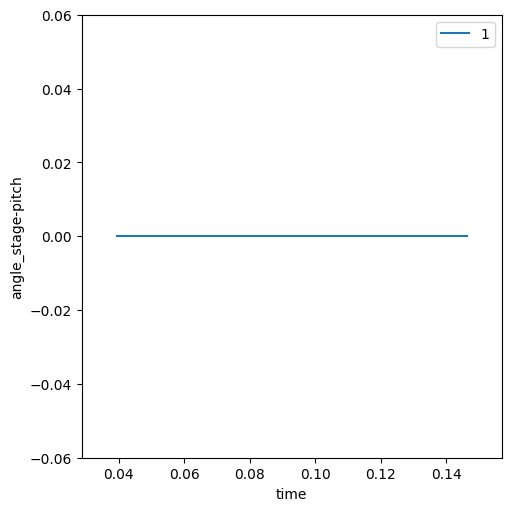

In [7]:
RE(bp.count( [sample_stage.pitch], num = 3),bec)

To connect all the devices, make use of make_all_devices

In [8]:
from dodal.utils import make_all_devices
devices, error = make_all_devices("dodal.beamlines.p99",connect_immediately = True)
print(error)

{}


List connected devices

In [9]:
devices

{'andor2_point': <ophyd_async.epics.adcore._single_trigger.SingleTriggerDetector at 0x7f243bf94f50>,
 'andor2_det': <ophyd_async.epics.adandor._andor.Andor2Detector at 0x7f243bf139d0>,
 'lab_stage': <dodal.devices.motors.XYZPositioner at 0x7f243bf33890>,
 'sample_stage': <dodal.devices.motors.XYZPositioner at 0x7f243bf42310>,
 'filter': <dodal.devices.attenuator.filter.FilterMotor at 0x7f243bfe0050>,
 'angle_stage': <dodal.devices.p99.sample_stage.SampleAngleStage at 0x7f244a05f010>}



Transient Scan ID: 2     Time: 2025-03-10 14:29:34
Persistent Unique Scan ID: '02b407d7-4eeb-4ac2-a22f-77c2ef9704b6'
New stream: 'primary'
+-----------+------------+-------------+-------------+-------------+
|   seq_num |       time | lab_stage-x | lab_stage-y | lab_stage-z |
+-----------+------------+-------------+-------------+-------------+
|         1 | 14:29:34.1 |       0.001 |       0.001 |       0.001 |
|         2 | 14:29:34.7 |       0.001 |       0.001 |       0.001 |
|         3 | 14:29:35.1 |       0.001 |       0.001 |       0.001 |
+-----------+------------+-------------+-------------+-------------+
generator count ['02b407d7'] (scan num: 2)





('02b407d7-4eeb-4ac2-a22f-77c2ef9704b6',)

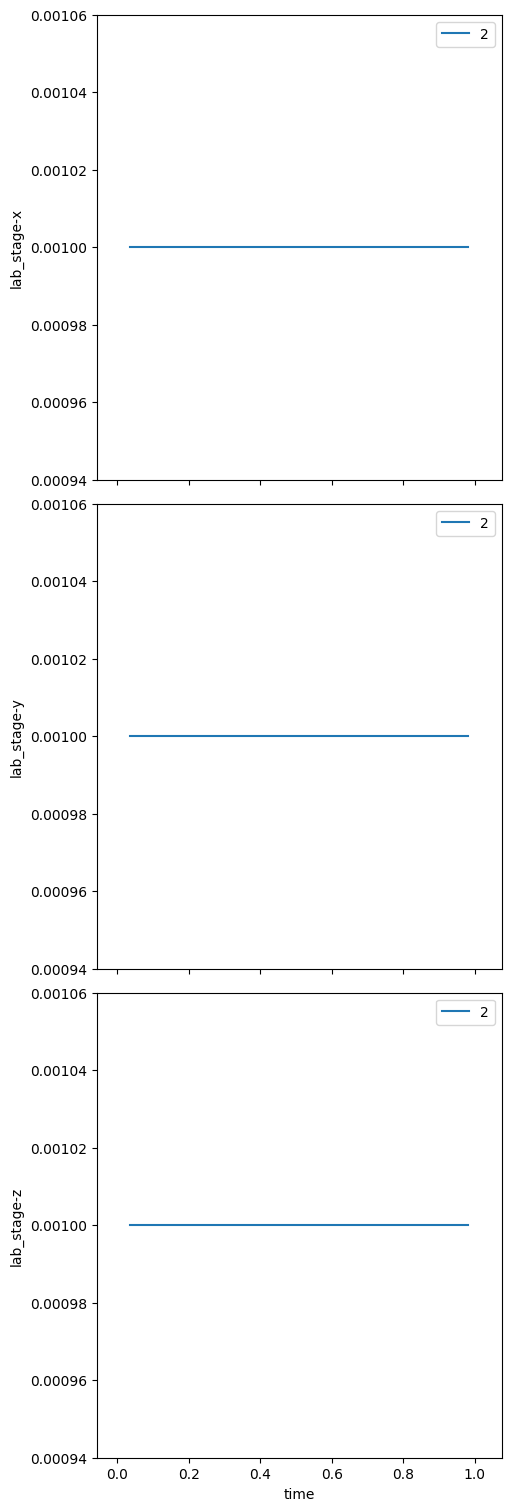

CA.Client.Exception...............................................
    Context: "bl99p-ea-serv-01.diamond.ac.uk:33557"
    Source File: modules/ca/src/client/cac.cpp line 1237
    Current Time: Mon Mar 10 2025 15:32:18.246872982
..................................................................


In [10]:
RE(bp.count([devices["lab_stage"]], num = 3),bec)